# Linear Regression



In [41]:
import jax 
import jax.numpy as jnp
import numpy as np
import jax.random as random
import matplotlib
import matplotlib.pyplot as plt

from basic.linear import LinearRegression, RidgeRegression
from basic.basis import Polynomial

np.random.seed(111)

In [42]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t


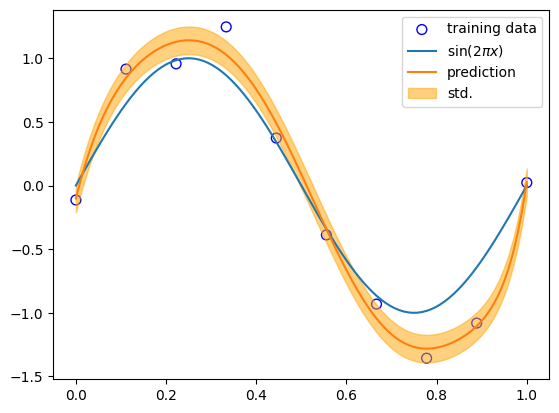

In [43]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

# add polynomial features
basis = Polynomial()
X_train = basis.transform(x_train, degree=9)
X_test = basis.transform(x_test, degree=9)

# fit linear regression model
model = LinearRegression()

w, var = jax.jit(model.fit)(X_train, y_train)
y, y_std = jax.jit(model.predict)(w, var, X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.fill_between(
    x_test, y - y_std, y + y_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()



## Ridge Regression


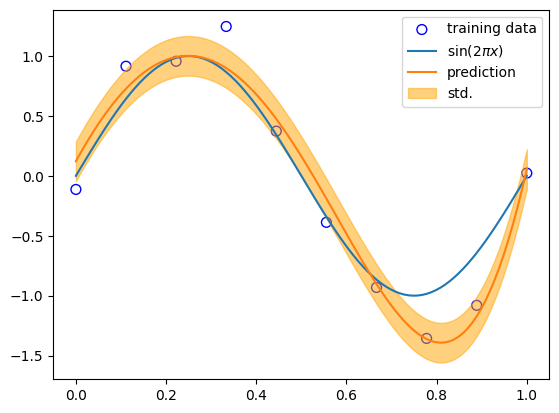

In [44]:
model = RidgeRegression()
w, var = model.fit(X_train, y_train, alpha=1e-3)
y, y_std = model.predict(w, var, X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.fill_between(
    x_test, y - y_std, y + y_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()